In [130]:
import pandas as pd
import glob
from statistics import mode
import numpy as np

In [367]:
# Functions
agree_label = lambda row: mode(row.iloc[-3:])
agree_score = lambda row: row.iloc[-3:].value_counts().max()
strip_lower = lambda x: str(x).strip().lower()
def clean_and_score(filepath):
    df = pd.read_csv(filepath, index_col=0)
    df.iloc[:,-1] = df.iloc[:,-1].apply(strip_lower)
    df.iloc[:,-2] = df.iloc[:,-2].apply(strip_lower)
    df.iloc[:,-3] = df.iloc[:,-3].apply(strip_lower)
    agree_scores = df.apply(agree_score, axis=1)
    df_agree_only = df[agree_scores>=2]
    agree_labels = df_agree_only.apply(agree_label, axis = 1)
    df_agree_only = df_agree_only.copy()
    df_agree_only["score"] = agree_scores
    df_agree_only["agree_label"] = agree_labels
    return df_agree_only

# Reef Substrate

In [361]:
BayHarbor_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_BayHarbor_ReefSubstrate_combined.csv'
ElkRapids_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_ElkRapids_ReefSubstrate_combined.csv'
FishermansIsland_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_FishermansIsland_ReefSubstrate_combined.csv'
IngallsPoint_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_IngallsPoint_ReefSubstrate_combined.csv'
MissionPeninsula_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_MissionPeninsula_ReefSubstrate_combined.csv'
TanneryCreek_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_TanneryCreek_ReefSubstrate_combined.csv'
TraverseShoal_substrate = r'Z:\\Proj_SubstrateClassification\\ReefSubstrateLabels\\Combined\\Headers_csv\\imgs_TraverseShoal_ReefSubstrate_combined.csv'
BayHarbor_agree = clean_and_score(BayHarbor_substrate)
ElkRapids_agree = clean_and_score(ElkRapids_substrate)
FishermansIsland_agree = clean_and_score(FishermansIsland_substrate)
IngallsPoint_agree = clean_and_score(IngallsPoint_substrate)
MissionPeninsula_agree = clean_and_score(MissionPeninsula_substrate)
TanneryCreek_agree = clean_and_score(TanneryCreek_substrate)
TraverseShoal_agree = clean_and_score(TraverseShoal_substrate)

In [362]:
# combine and fix white space / capitalization
reef_substrate_all = pd.concat([BayHarbor_agree, ElkRapids_agree, FishermansIsland_agree, IngallsPoint_agree, MissionPeninsula_agree, TanneryCreek_agree,  TraverseShoal_agree]).reset_index(drop=True)
assert reef_substrate_all.shape[0] == BayHarbor_agree.shape[0] + ElkRapids_agree.shape[0] + FishermansIsland_agree.shape[0] + IngallsPoint_agree.shape[0] + MissionPeninsula_agree.shape[0] + TanneryCreek_agree.shape[0] + TraverseShoal_agree.shape[0]

In [365]:
reef_substrate_all

,image_name,Heading_D,Pitch_D,Roll_D,Temp_C,AUV_depth_m,Alt_m,Salinity_ppt,Speed_kn,Lat_DD,...,image_path,collect_id,AUV,cam_sys,Nick_class,Andrew_class,Dan_class,score,agree_label,Luke_class
0,CI_1623102168_274.png,271.215030,-0.550000,1.550000,27.800000,8.420000,1.400000,0.0,2.100000,45.375156,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210607_001_Iver3069_ABS1,Iver3069,ABS1,unknown,fine,fine,2,fine,NaN
1,CI_1623102171_490.png,273.525020,0.050000,1.300000,27.800000,8.415000,1.325000,0.0,2.100000,45.375160,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210607_001_Iver3069_ABS1,Iver3069,ABS1,unknown,fine,fine,2,fine,NaN
2,CI_1623102174_705.png,275.305000,2.050000,1.700000,27.800000,8.370000,1.260000,0.0,2.100000,45.375160,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210607_001_Iver3069_ABS1,Iver3069,ABS1,fine,fine,fine,3,fine,NaN
3,CI_1623102177_921.png,277.275020,1.250000,1.200000,27.800000,8.230000,1.285000,0.0,2.100000,45.375168,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210607_001_Iver3069_ABS1,Iver3069,ABS1,fine,fine,fine,3,fine,NaN
4,CI_1623102181_137.png,277.794980,0.700000,0.650000,27.800000,8.145000,1.275000,0.0,2.100000,45.375170,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210607_001_Iver3069_ABS1,Iver3069,ABS1,fine,fine,fine,3,fine,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16917,CI_1622927392_346.png,212.245000,1.150000,1.050000,31.900000,9.240000,1.615000,0.0,2.250000,45.141960,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210605_002_Iver3069_ABS1,Iver3069,ABS1,NaN,coarsealgae,coarsealgae,3,coarsealgae,coarsealgae
16918,CI_1622927395_562.png,210.930000,14.100000,0.300000,31.900000,9.030001,1.845000,0.0,2.250000,45.141945,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210605_002_Iver3069_ABS1,Iver3069,ABS1,NaN,coarsealgae,coarsealgae,3,coarsealgae,coarsealgae
16919,CI_1622927397_179.png,227.184767,-3.315233,1.223835,19.400000,8.874323,1.690126,0.0,1.530000,45.142062,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210605_002_Iver3069_ABS1,Iver3069,ABS1,NaN,coarsealgae,coarsealgae,3,coarsealgae,coarsealgae
16920,CI_1622927401_190.png,206.489990,23.150002,0.400000,31.900000,7.745000,3.280000,0.0,2.250000,45.141914,...,Z:\__Organized_Directories_InProgress\2021_Unp...,20210605_002_Iver3069_ABS1,Iver3069,ABS1,NaN,coarsealgae,coarsealgae,3,coarsealgae,coarsealgae


In [371]:
print(reef_substrate_all.shape)
# check for spelling and capitalization
acr = sorted(reef_substrate_all.Andrew_class.unique())
lcr = sorted(reef_substrate_all.Luke_class.dropna().unique()) + ["nan"]
ncr = sorted(reef_substrate_all.Nick_class.dropna().unique()) + ["nan"]*2
dcr = sorted(reef_substrate_all.Dan_class.unique())
pd.DataFrame(np.c_[acr, lcr, ncr, dcr], columns=["andrew", "luke", "nick", "dan"])

(16922, 27)


,andrew,luke,nick,dan
0,bedrock,bedrock,bedrock,bedrock
1,boulder,boulder,boulder,boulder
2,coarsealgae,coarsealgae,coarsealgae,coarsealgae
3,cobble,cobble,cobble,cobble
4,fine,fine,fine,fine
5,granule,granule,gravelly,granule
6,gravelly,gravelly,gravelmixes,gravelly
7,gravelmixes,gravelmixes,pebble,gravelmixes
8,nan,pebble,slightlygravelly,nan
9,pebble,slightlygravelly,unknown,pebble


## Reef substrate agreements

coarsealgae         3828
unknown             1133
fine                 831
gravelmixes          285
cobble               271
slightlygravelly     249
bedrock              141
boulder              118
gravelly              59
pebble                19
granule                2
Name: count, dtype: int64

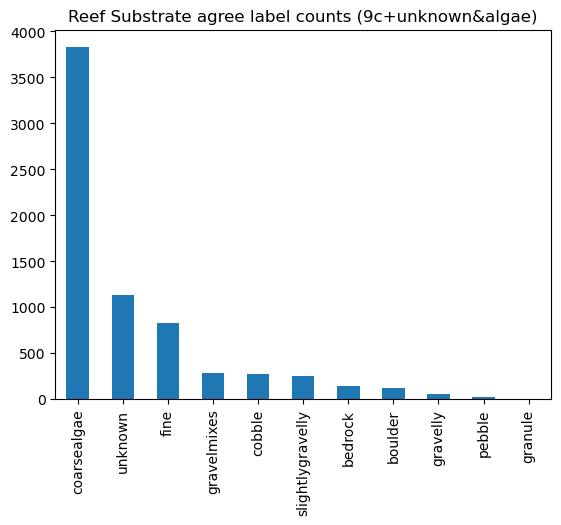

In [421]:
agree_score_reef = reef_substrate_all.apply(agree_score, axis=1)
reef_substrate_agree = reef_substrate_all[agree_score_reef>=2]
Reef_agreement_label = reef_substrate_agree.apply(agree_label, axis = 1)
Reef_agreement_label.value_counts().plot(kind='bar', title='Reef Substrate agree label counts (9c+unknown&algae)')
Reef_agreement_label.value_counts()

coarsealgae         3828
unknown             1133
fine                 831
verycoarse           389
mixedcoarse          344
mixed                249
consolidated         141
moderatelycoarse      21
Name: count, dtype: int64

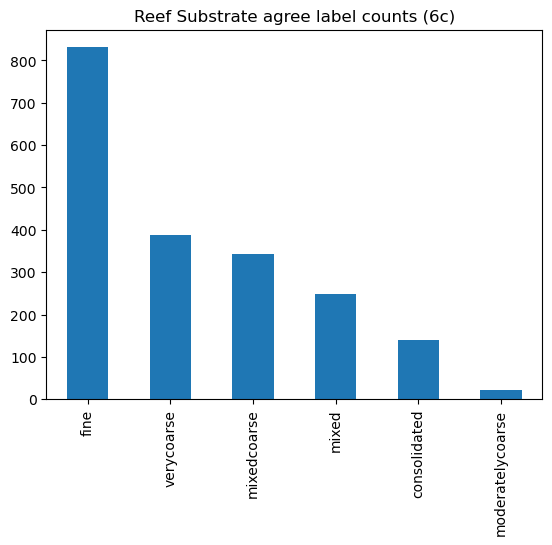

In [423]:
dict_9_to_6 = {
    'slightlygravelly':"mixed", 'coarsealgae':"coarsealgae", 'unknown':"unknown", 'bedrock':"consolidated", 'boulder':"verycoarse",
     'cobble':"verycoarse", 'gravelmixes':"mixedcoarse", 'pebble':"moderatelycoarse", 'gravelly':"mixedcoarse", 
     'granule':"moderatelycoarse", 'fine':"fine", "nan":"nan"
}
apl_96 = lambda x: dict_9_to_6[x]
Reef_agreement_label_6c = Reef_agreement_label.apply(apl_96)
Reef_agreement_label_6c[(Reef_agreement_label_6c!="coarsealgae") & (Reef_agreement_label_6c!="unknown")].value_counts().plot(kind='bar', title='Reef Substrate agree label counts (6c)')
Reef_agreement_label_6c.value_counts()

# Lake Huron/Ontario

In [376]:
# Lake_Huron_substrate = pd.read_csv(r"Z:\Proj_SubstrateClassification\LH_LO_3mDEM_Overlap\LakeHuron\__Metadata\LakeHuron_labeled\LHCO.csv", index_col=0)
# # Lake_Ontario_substrate = r"Z:\Proj_SubstrateClassification\LH_LO_3mDEM_Overlap\LakeHuron\__Metadata\LakeHuron_labeled\LHCO.csv"
# # Andrew class is a 6-class
# dict_6_to_9 = {
#     'moderately_coarse':"pebble", 'fine':"fine", 
#     'mixed':"slightlygravelly",'mixed_coarse':"gravelmixes",
#     "very_coarse":"cobble", np.nan: np.nan
# }
# apl_69 = lambda x: dict_6_to_9[x]
# Lake_Huron_substrate['Andrew_class'] = Lake_Huron_substrate['Andrew_class'].apply(apl_69)
# Lake_Huron_substrate.to_csv(r"Z:\Proj_SubstrateClassification\LH_LO_3mDEM_Overlap\LakeHuron\__Metadata\LakeHuron_labeled\LHCO_edt.csv")


In [388]:
Lake_Huron_substrate = r"Z:\Proj_SubstrateClassification\LH_LO_3mDEM_Overlap\LakeHuron\__Metadata\LakeHuron_labeled\LHCO_edt.csv"
Lake_substrate_agree = clean_and_score(Lake_Huron_substrate)

In [389]:
print(Lake_substrate_agree.shape)
# check for spelling and capitalization
acl = sorted(Lake_substrate_agree.Andrew_class.unique())+["nan"]*5
lcl = ["nan"]*10
ncl = sorted(Lake_substrate_agree.Nick_class.unique())+["nan"]*0
dcl = sorted(Lake_substrate_agree.Dan_class.unique())+["nan"]*0
pd.DataFrame(np.c_[acl, lcl, ncl, dcl], columns=["andrew", "luke", "nick", "dan"])

(2276, 30)


,andrew,luke,nick,dan
0,cobble,nan,bedrock,bedrock
1,fine,nan,boulder,boulder
2,gravelmixes,nan,coarsealgae,coarsealgae
3,pebble,nan,cobble,cobble
4,slightlygravelly,nan,fine,fine
5,nan,nan,gravelly,gravelly
6,nan,nan,gravelmixes,gravelmixes
7,nan,nan,pebble,pebble
8,nan,nan,slightlygravelly,slightlygravelly
9,nan,nan,unknown,unknown


In [428]:
Lake_substrate_agree.agree_label.value_counts()

agree_label
cobble              693
gravelmixes         442
coarsealgae         378
slightlygravelly    340
gravelly            212
pebble               65
boulder              63
fine                 48
unknown              33
bedrock               2
Name: count, dtype: int64

In [402]:
dict_9_to_6 = {
    'slightlygravelly':"mixed", 'coarsealgae':"coarsealgae", 'unknown':"unknown", 'bedrock':"consolidated", 'boulder':"verycoarse",
     'cobble':"verycoarse", 'gravelmixes':"mixedcoarse", 'pebble':"moderatelycoarse", 'gravelly':"mixedcoarse", 
     'granule':"moderatelycoarse", 'fine':"fine", np.nan: np.nan
}
apl_96 = lambda x: dict_9_to_6[x]
Lake_agreement_label_6c = Lake_substrate_agree.agree_label.apply(apl_96)

In [426]:
Lake_agreement_label_6c.value_counts()

agree_label
verycoarse          756
mixedcoarse         654
coarsealgae         378
mixed               340
moderatelycoarse     65
fine                 48
unknown              33
consolidated          2
Name: count, dtype: int64

<Axes: title={'center': 'Lake Huron agree label counts (6c)'}, xlabel='agree_label'>

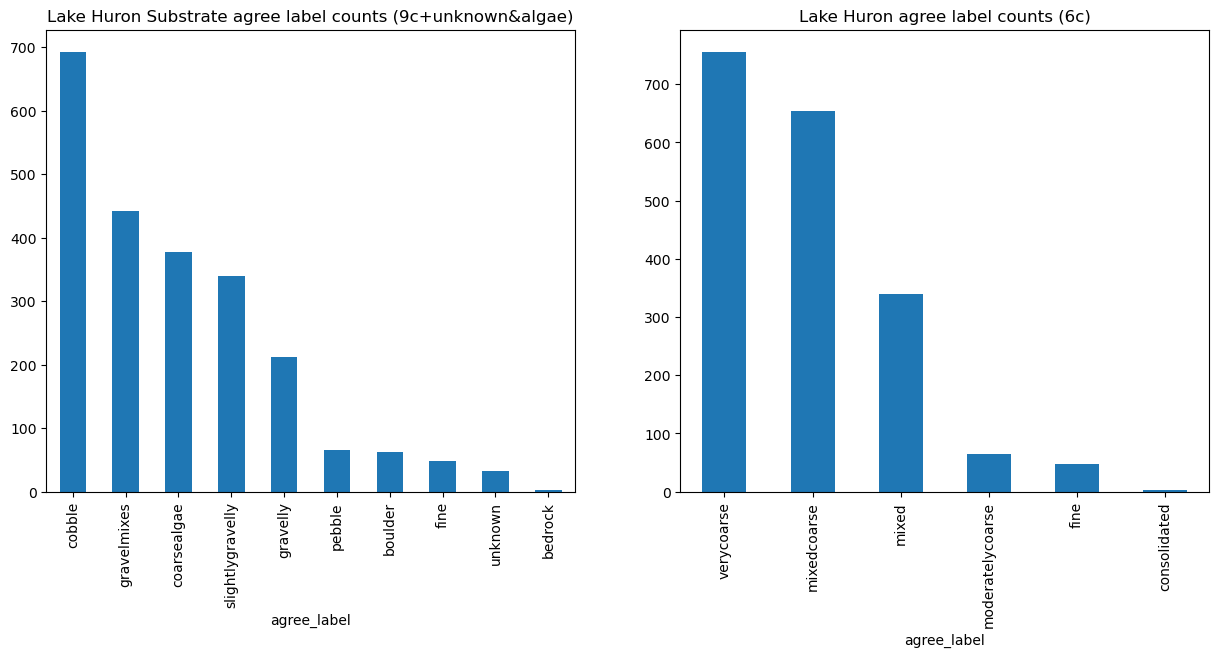

In [425]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(15,6))
Lake_substrate_agree.agree_label.value_counts().plot(kind='bar', title='Lake Huron Substrate agree label counts (9c+unknown&algae)', ax=axs[0])
Lake_agreement_label_6c[(Lake_agreement_label_6c!="coarsealgae") & (Lake_agreement_label_6c!="unknown")].value_counts().plot(kind='bar', title='Lake Huron agree label counts (6c)', ax = axs[1])
